In [1]:
!pip install ipympl
!pip install trimesh
!python -m pip install scipy


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
%matplotlib ipympl
import numpy as np
import scipy.spatial as sp
import trimesh
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
point_clouds = []
# Carregando todas as point clouds
for index in range(0, 29):
    # Usando operador ternario para avaliar se é necessário o 0 a mais
    file_name = "./KITTI-Sequence/0000"+ (("0" + str(index)) if index < 10 else str(index) )+"_points.obj"
    point_cloud = trimesh.load(file_name).vertices
    point_clouds.append(point_cloud)

/tmp/ipykernel_19321/2571289076.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, z, zdir='z', s=0.3, c=color)
/tmp/ipykernel_19321/2571289076.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


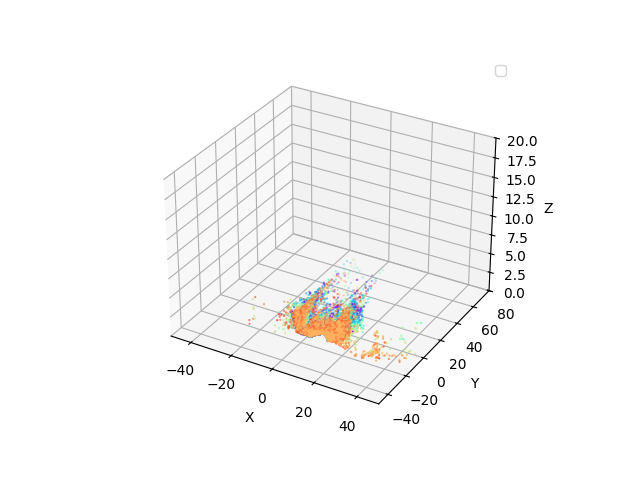

In [4]:
ax = plt.figure().add_subplot(projection='3d')
colors = cm.rainbow(np.linspace(0, 1, len(point_clouds)))
for color, point_cloud in zip(colors, point_clouds):
    size = len(point_cloud.T[0])
    choices = np.random.choice(size, size=500, replace=False)
    x = point_cloud.T[0][choices]
    y = point_cloud.T[1][choices]
    z = point_cloud.T[2][choices]
    ax.scatter(x, y, z, zdir='z', s=0.3, c=color)

ax.legend()

ax.set_xlim(-50, 50)
ax.set_ylim(-50, 80)
ax.set_zlim(0, 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [123]:
def icp(source_points, target_points, epsilon = 10):
    # Keeping original points untouched

    def register_points(a, b):
        a1 = np.column_stack((a,np.ones(a.shape[0])))
        b1 = np.column_stack((b,np.ones(b.shape[0])))

        matrixA = np.tensordot(a1,a1.T,axes=[0,1])
        matrixR = np.tensordot(a1,b1.T,axes=[0,1])
        matrixAinv = np.linalg.inv(matrixA)
        
        return np.tensordot(matrixAinv,matrixR,axes=1).transpose() 
        
    
    current_points = source_points.copy()
    last_rmse = 0

    while True:
        # Input has to be of shape (N, M) where
        # N = Number of points
        # M = dimensions
        # Thus the transpose is used
        kdt = sp.KDTree(target_points, leafsize = 10)
        dist, indexes = kdt.query(current_points, k = 1, eps = 1e-10, workers = 4)

        # Getting position of queried points
        target_selected = target_points[indexes, :]

        # Calculating transformation Matrix
        transformation_matrix = register_points(current_points, target_selected)

        # Reshaping to apply transformation Matrix
        p = np.append(source_points, [[1]] * source_points.shape[0], axis = 1)
        q = np.append(target_selected, [[1]] * target_selected.shape[0], axis = 1).T

        # Updating current points
        predicted_points = np.dot(transformation_matrix, p.T)

        # Calculating RMSE
        rmse = np.sum(np.sqrt(np.sum((predicted_points-q)**2, axis=0)))
        print(rmse)

        if np.abs(rmse - last_rmse) < epsilon:
            return transformation_matrix

        current_points = predicted_points[:3, :].T
        last_rmse = rmse
        
        

In [124]:
tm = icp(point_clouds[0], point_clouds[1])

8997.5766620251
8179.225225831236
8008.1233463548
8025.30144775112
8010.333998831066
8016.8529738706975
8011.414016713159
8015.118570413328
8011.88074551617
8014.525338324252
8012.084759732273
8014.224409744862
8012.331453101878
8013.968623788342
8012.564873856153
8013.795354262038
8012.655474896973
8013.722648426114
8012.707867861681
8013.641089126088
8012.756977979311
8013.515169482051
8012.84937375208
8013.463290435707
8012.974820971991
8013.333478506042
8013.058552909799
8013.284140150472
8013.093011267143
8013.243433046996
8013.105933678278
8013.243912550246
8013.1300414535335
8013.215086876834
8013.1548532717425
8013.196931847019
8013.172183218176
8013.18691238838
8013.147724679079
8013.204564057587
8013.152255908877
8013.210151394919
8013.146279302245
8013.201989503805
8013.154542683076
8013.207769405423
8013.1487374308235
8013.203321981497
8013.175966268161
8013.191484133565
8013.187894494649
8013.190147118961
8013.189249011784
8013.188761835132
8013.190663724775
8013.193636882

KeyboardInterrupt: 

In [79]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(point_clouds[0], y, z, zdir='z', s=0.3, c=color)

ax.legend()

ax.set_xlim(-50, 50)
ax.set_ylim(-50, 80)
ax.set_zlim(0, 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

array([[ 9.98285063e-01,  2.02626371e-03,  7.29186946e-03,
        -7.92443987e-03],
       [ 3.09714195e-03,  1.00093283e+00, -8.31038669e-02,
        -1.25220668e-01],
       [ 5.93370220e-04, -2.06974876e-04,  9.99297839e-01,
        -3.49579852e-03],
       [ 9.10983935e-19,  2.20198920e-17,  5.07135566e-16,
         1.00000000e+00]])

In [38]:
a1 = np.column_stack((a,np.ones(a.shape[0])))
b1 = np.column_stack((b,np.ones(b.shape[0])))

matrixA = np.tensordot(a1,a1.T,axes=[0,1])
matrixR = np.tensordot(a1,b1.T,axes=[0,1])
matrixAinv = np.linalg.inv(matrixA)

tm = np.tensordot(matrixAinv,matrixR,axes=1).transpose() 

In [39]:
print(a1)
print(b1)

[[0.5449 0.1955 0.9227 1.    ]
 [0.6862 0.7202 0.8004 1.    ]
 [0.8936 0.7218 0.2859 1.    ]
 [0.0548 0.8778 0.5437 1.    ]
 [0.3037 0.5824 0.9848 1.    ]
 [0.0462 0.0707 0.7157 1.    ]]
[[2.5144 7.0691 1.9754 1.    ]
 [2.8292 7.4454 2.2224 1.    ]
 [3.3518 7.306  2.1198 1.    ]
 [2.8392 7.8455 1.6229 1.    ]
 [2.4901 7.5449 1.9518 1.    ]
 [2.4273 7.1354 1.4349 1.    ]]


In [42]:
print(matrixA)
print(matrixR)

[[1.66367858 1.47397433 1.66943781 2.5294    ]
 [1.47397433 2.19262462 2.06460592 3.1684    ]
 [1.66943781 2.06460592 3.35142148 4.2532    ]
 [2.5294     3.1684     4.2532     6.        ]]
[[ 7.33063487 18.54060268  5.24364858  2.5294    ]
 [ 9.06257839 23.80305937  6.17959219  3.1684    ]
 [11.27595031 31.37336378  8.03902266  4.2532    ]
 [16.452      44.3463     11.3272      6.        ]]
